 #  video game sales analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os


In [2]:
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Exploratory Data Analysis¶


In [4]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
df.shape

(16598, 11)

In [6]:
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df.groupby('Genre')['NA_Sales'].agg(np.mean).sort_values(ascending=False)


Genre
Platform        0.504571
Shooter         0.444733
Sports          0.291283
Racing          0.287766
Action          0.264726
Fighting        0.263667
Misc            0.235906
Role-Playing    0.219946
Puzzle          0.212680
Simulation      0.211430
Strategy        0.100881
Adventure       0.082271
Name: NA_Sales, dtype: float64

### So it is the most profitable type of game in North America is (Platform)

In [9]:
df.groupby('Genre')['EU_Sales'].agg(np.mean).sort_values(ascending=False)


Genre
Shooter         0.239137
Platform        0.227573
Racing          0.190865
Sports          0.160635
Action          0.158323
Simulation      0.130773
Role-Playing    0.126384
Misc            0.124198
Fighting        0.119481
Puzzle          0.087251
Strategy        0.066579
Adventure       0.049868
Name: EU_Sales, dtype: float64

### and it is the most profitable type of game in Europe is (Shooter)

In [10]:
df.groupby('Genre')['JP_Sales'].agg(np.mean).sort_values(ascending=False)


Genre
Role-Playing    0.236767
Platform        0.147596
Fighting        0.103007
Puzzle          0.098471
Simulation      0.073472
Strategy        0.072628
Misc            0.061967
Sports          0.057702
Action          0.048236
Racing          0.045388
Adventure       0.040490
Shooter         0.029221
Name: JP_Sales, dtype: float64

### the most profitable type of game in Japan is (Role-Playing)

In [11]:
df['NA_Sales'].mean()

0.26466742981082064

In [12]:
df['EU_Sales'].mean()

0.14665200626581515

In [13]:
 df['JP_Sales'].mean()

0.077781660441017

### The most profitable region in gaming is north america

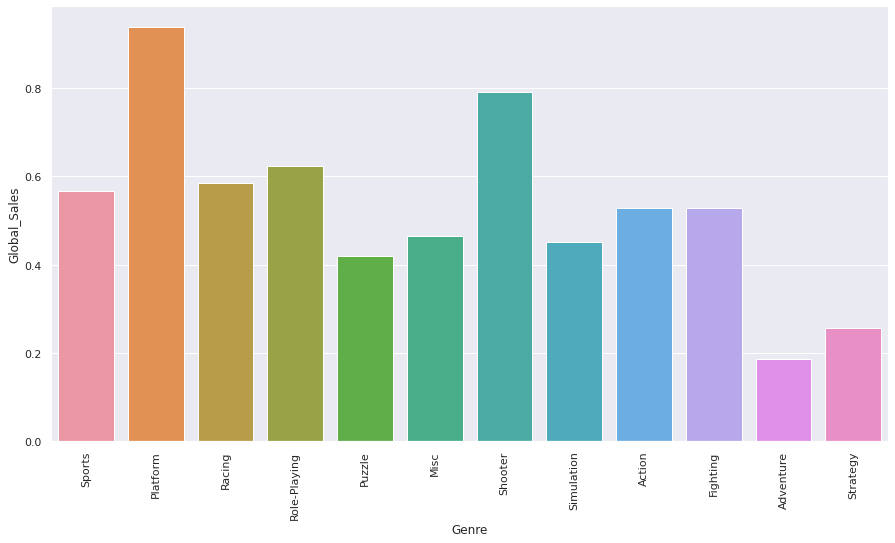

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.barplot(x = 'Genre', y = 'Global_Sales', data = df, ci = None)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);

### so in this fhgure we notice the platform is the most genre profitable

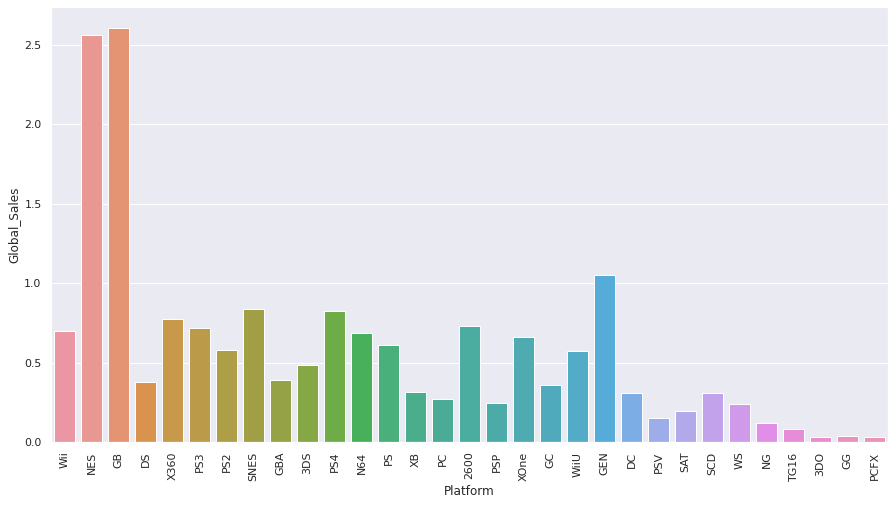

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.barplot(x = 'Platform', y = 'Global_Sales', data = df, ci = None)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);

### and the most platform profitable is Gb

In [16]:
df.groupby('Genre')['Rank'].agg(np.mean).sort_values(ascending=False)


Genre
Adventure       11532.787714
Strategy        10071.897210
Puzzle           9627.381443
Simulation       8626.085352
Misc             8561.847039
Role-Playing     8086.174731
Action           7973.879071
Racing           7961.515612
Fighting         7646.511792
Sports           7425.026428
Shooter          7369.367939
Platform         6927.251693
Name: Rank, dtype: float64

### so the Adventure has a higher rank from players

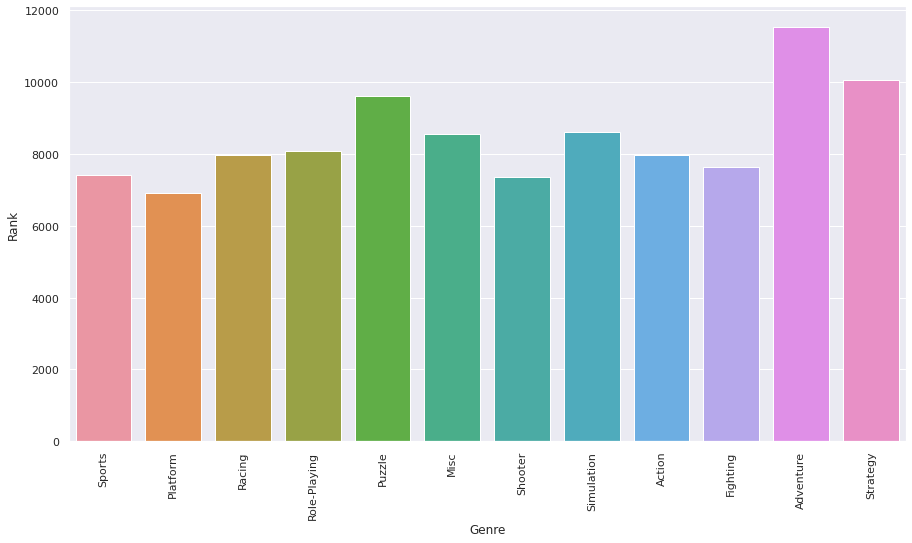

In [17]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.barplot(x = 'Genre', y = 'Rank', data = df, ci = None)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);

In [18]:
df.groupby('Platform')['Rank'].agg(np.mean).sort_values(ascending=False)


Platform
PCFX    14559.000000
3DO     14372.666667
GG      13527.000000
TG16    12381.500000
PSV     11458.210654
PC      11438.319792
NG      10665.666667
PSP     10399.873866
SCD     10171.833333
DS       9637.462321
SAT      9333.936416
3DS      9160.400786
DC       8771.423077
XB       8761.257282
GBA      8682.176399
GC       8664.390288
WS       7878.833333
WiiU     7756.237762
Wii      7730.774340
PS4      7625.562500
PS2      7477.633966
XOne     7397.061033
GEN      7037.740741
PS       6958.221572
PS3      6793.054929
X360     6692.528063
N64      6530.373041
SNES     6346.460251
2600     4403.496241
GB       3392.030612
NES      1906.438776
Name: Rank, dtype: float64

### so the pcfx platform has a higher rank from players

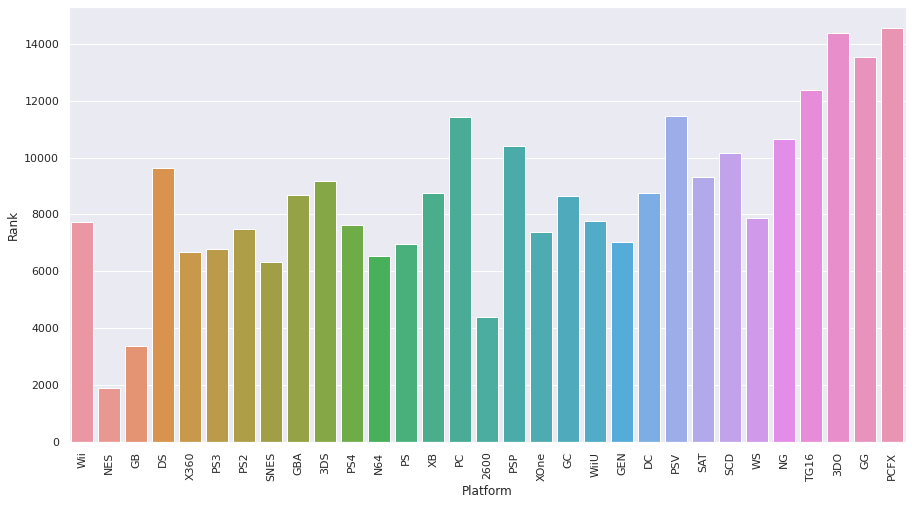

In [19]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.barplot(x = 'Platform', y = 'Rank', data = df, ci = None)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);

In [20]:
total = df["Platform"].value_counts()
total

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

### the DS is the platform that has a  high variety of games

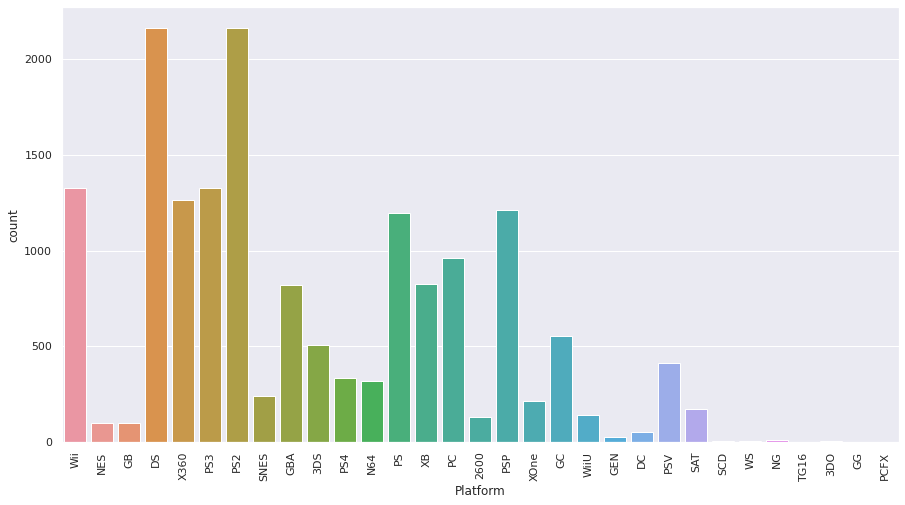

In [21]:
plot=sns.countplot(x='Platform',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);

In [22]:
df.groupby('Platform')['Global_Sales'].agg(np.sum).sort_values(ascending=False)


Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

### the ps2 platform has a high profitable in global sales

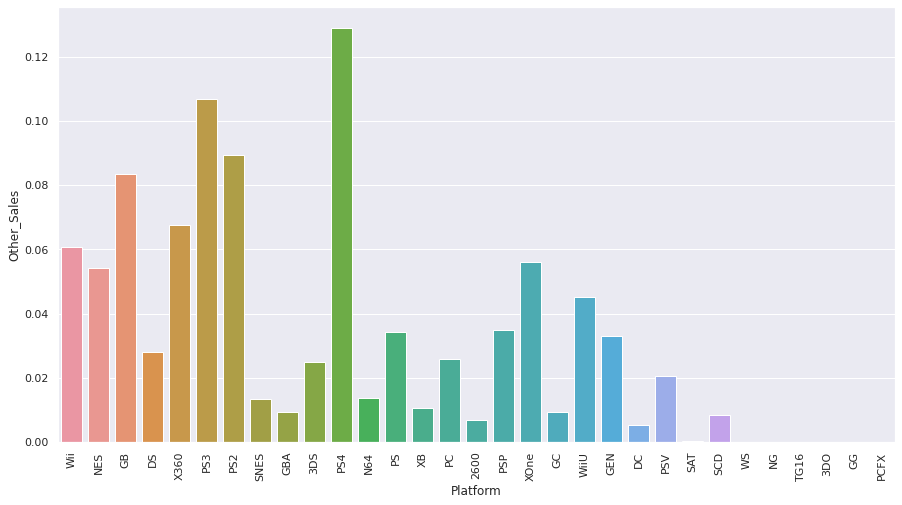

In [23]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.barplot(x = 'Platform', y = 'Other_Sales', data = df, ci = None)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90);

### the ps4 platform has a high profitable in other sales